# Fractional Brownian Motion Ensembles

Ensemble simulations that scan H values are used to validate second order moment calculations.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType)
from lib import (comparison, fpoints)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
nlags = 30
npts = 1023
nsim = 500

def source_plot(H):
    title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsim}, H = {format(H, '1.1f')}"
    fbm = DataSource.create_ensemble(SourceType.FBM_FFT, nsim, H=H, Δx=Δt, xmax=npts)
    comparison(fbm, title=title, data_type=DataType.TIME_SERIES)
    return fbm

def mean_plots(dfs):
    mean = DataFunc.apply_func_type_to_ensemble(dfs, DataType.MEAN)
    mean = DataFunc.apply_func_type(mean, DataType.FBM_MEAN)
    fpoints(mean, data_type=DataType.MEAN, func_type=DataType.FBM_MEAN)
    
def sd_plot(dfs, H):
    sd = DataFunc.apply_func_type_to_ensemble(dfs, DataType.SD)
    sd = DataFunc.apply_func_type(sd, DataType.FBM_SD, H=H)
    fpoints(sd, data_type=DataType.SD, func_type=DataType.FBM_SD)
    
def ac_plot(dfs, H):
    fbm_noise = DataFunc.apply_func_type_to_list(dfs, DataType.DIFF)
    ac = DataFunc.apply_func_type_to_ensemble(fbm_noise, DataType.ACF, source_data_type=DataType.DIFF, nlags=nlags)
    ac = DataFunc.apply_func_type(ac, DataType.FBM_ACF, H=H, npts=nlags)
    fpoints(ac, data_type=DataType.ACF, func_type=DataType.FBM_ACF)

## H=0.5 (Brownian Motion)

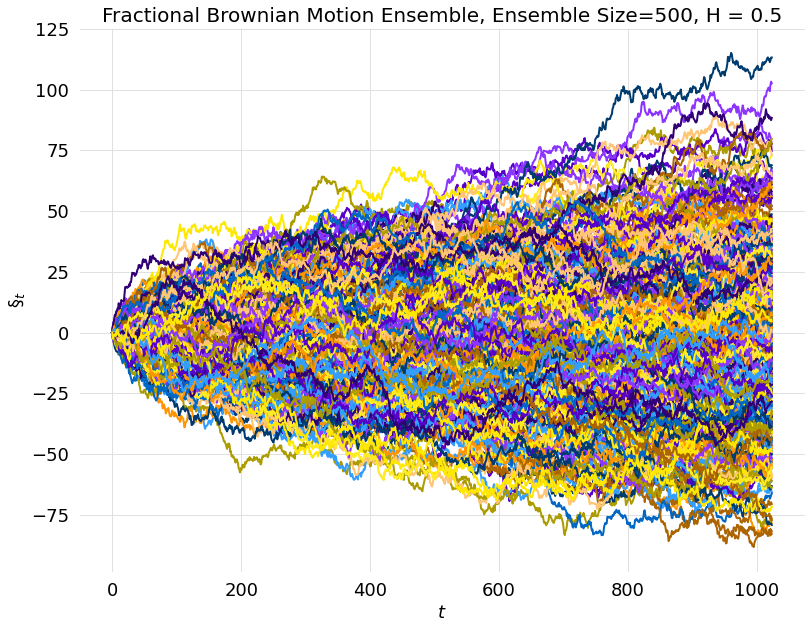

In [3]:
H=0.5
fbm = source_plot(H)

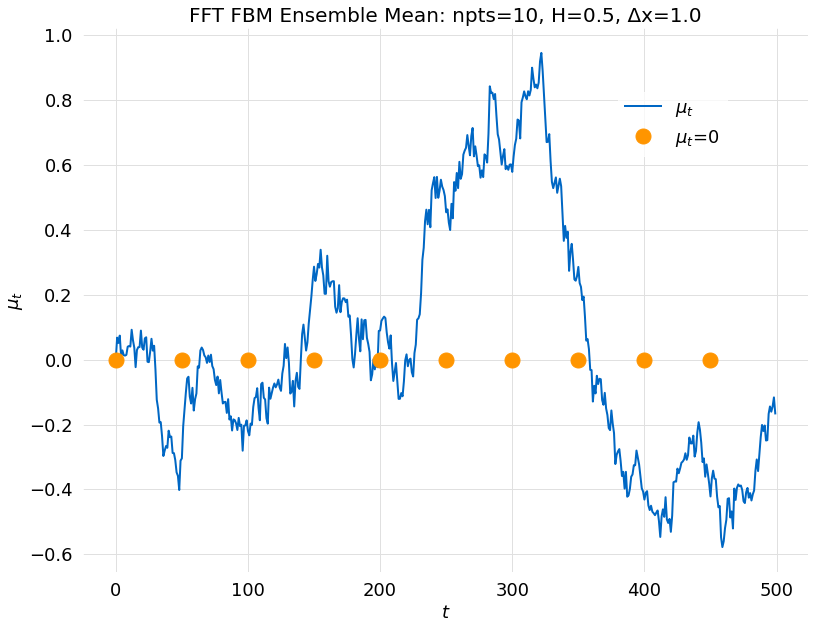

In [4]:
mean_plots(fbm)

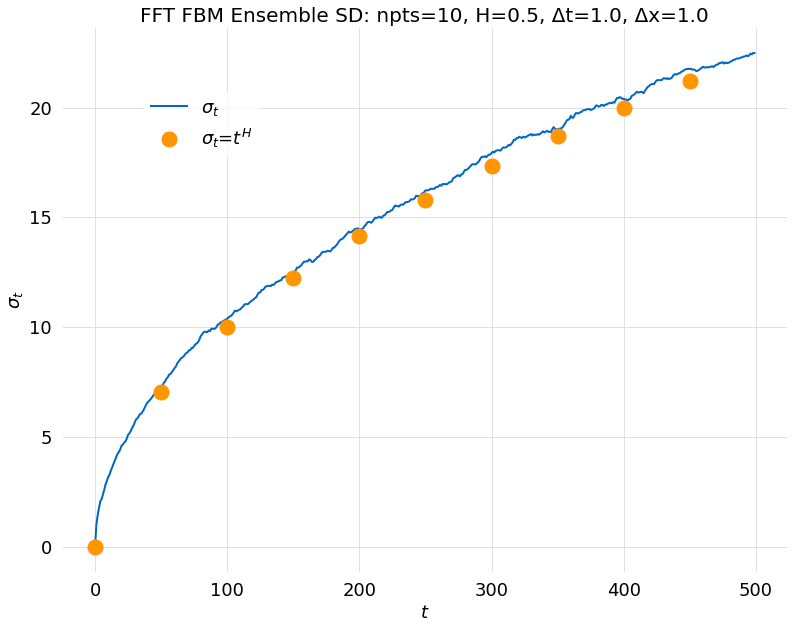

In [5]:
sd_plot(fbm, H)

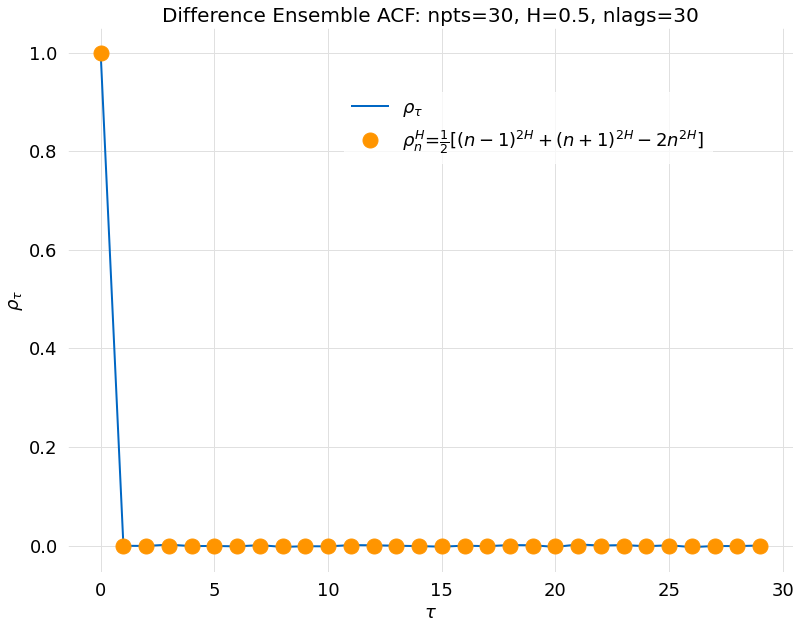

In [6]:
ac_plot(fbm, H)

## H = 0.7

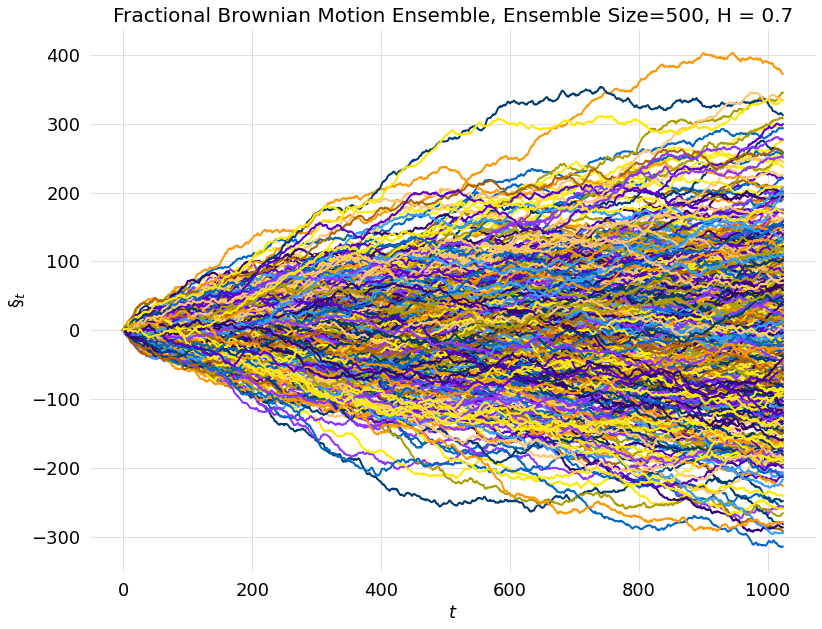

In [7]:
H=0.7
fbm = source_plot(H)

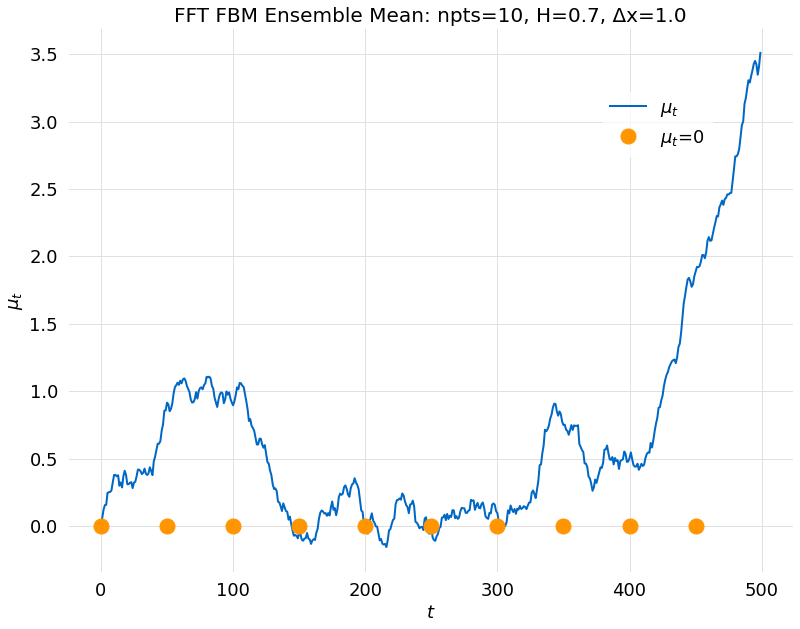

In [8]:
mean_plots(fbm)

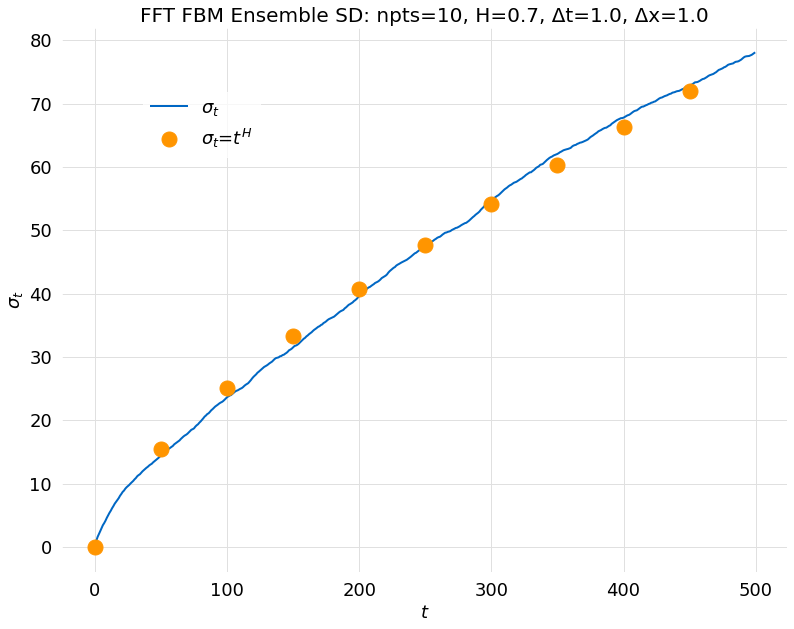

In [9]:
sd_plot(fbm, H)

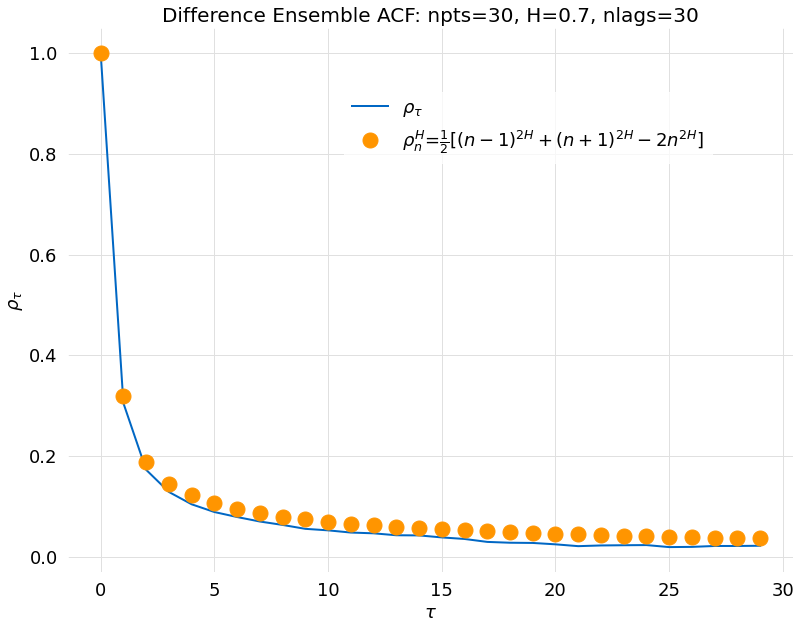

In [10]:
ac_plot(fbm, H)

## H=0.3

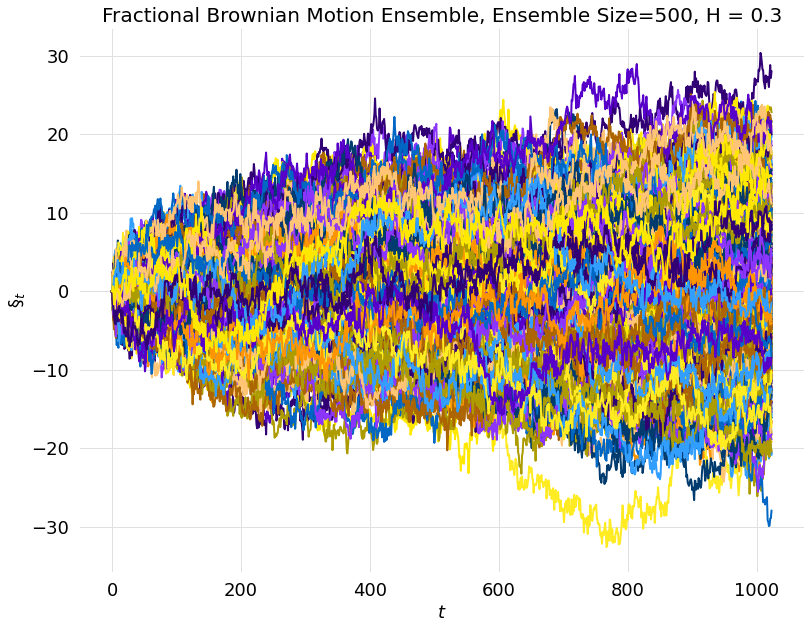

In [11]:
H=0.3
fbm = source_plot(H)

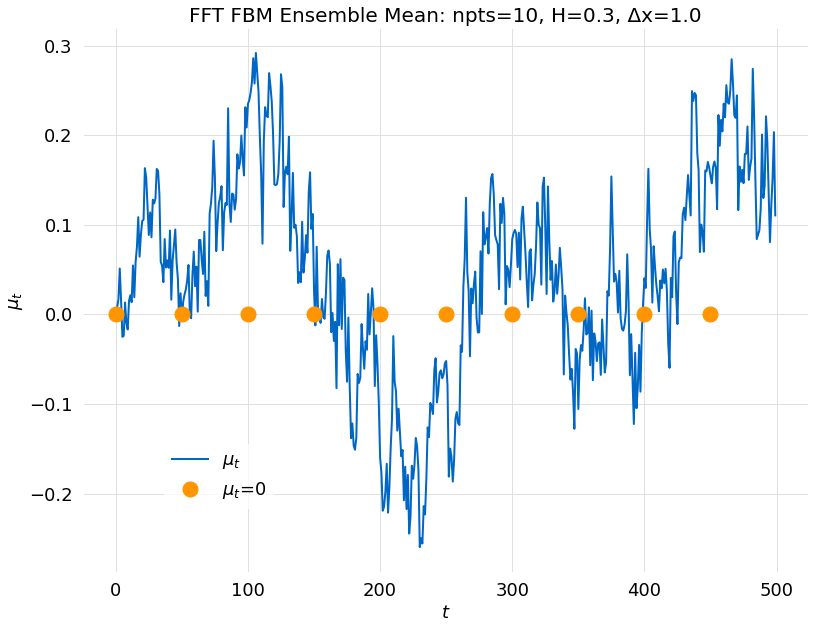

In [12]:
mean_plots(fbm)

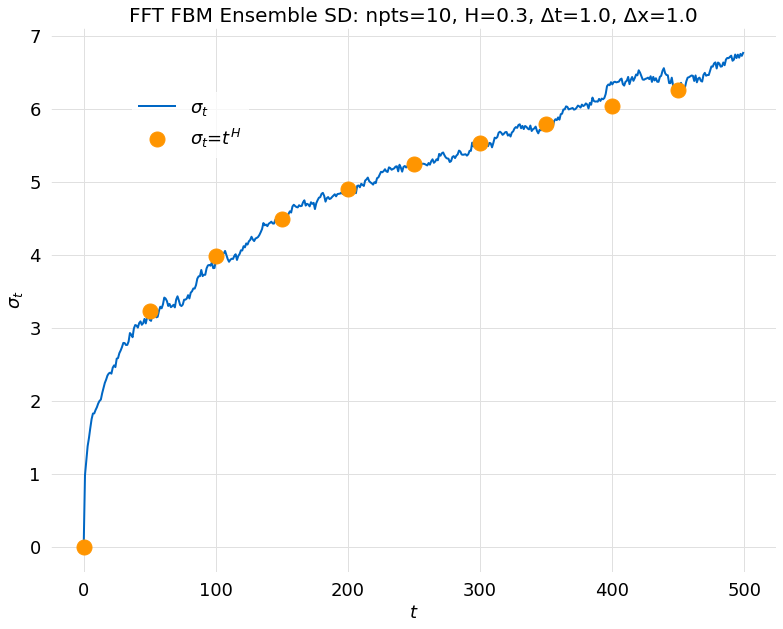

In [13]:
sd_plot(fbm, H)

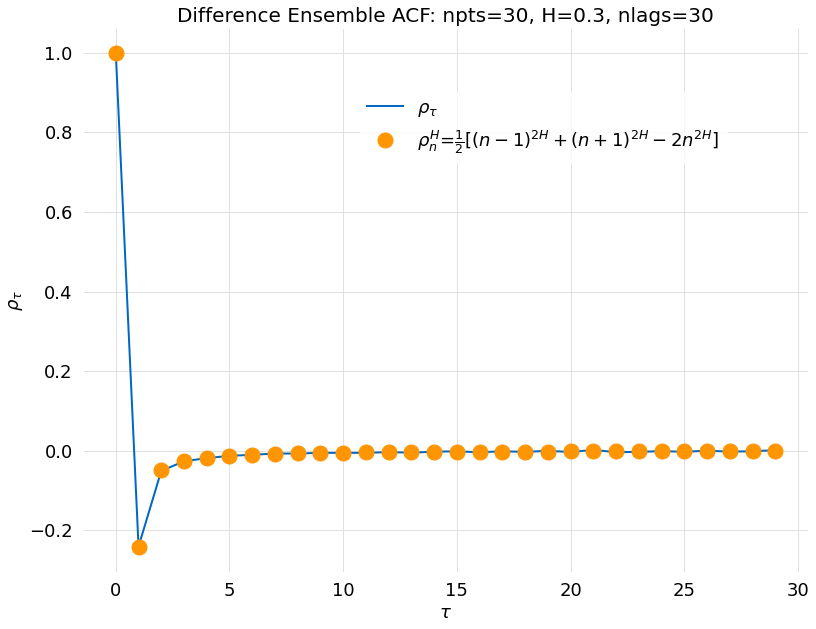

In [14]:
ac_plot(fbm, H)